In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load your dataset
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


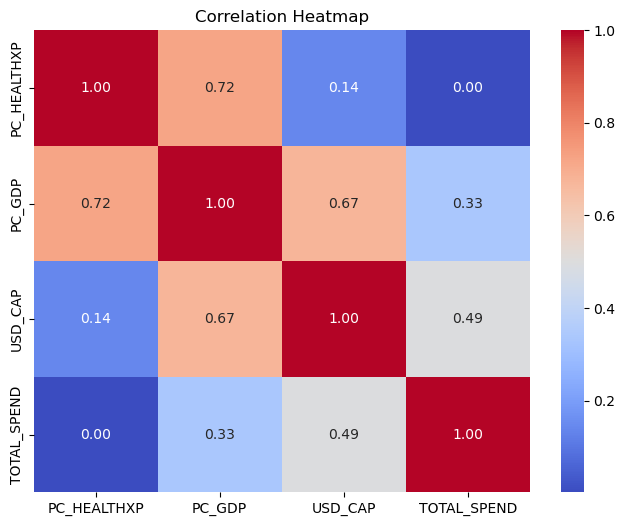

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

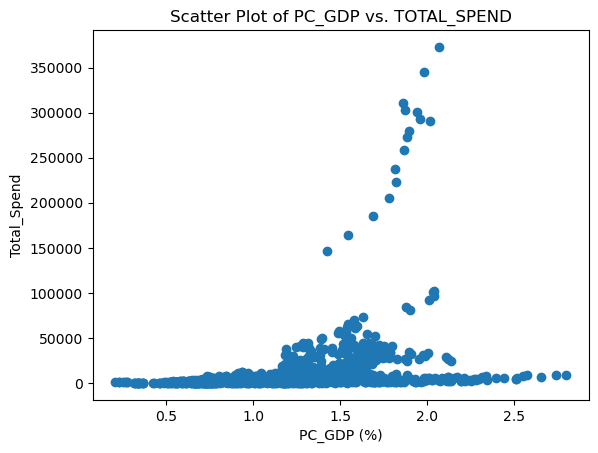

In [6]:
# Plot PC_GDP vs. TOTAL_SPEND
plt.scatter(x='PC_GDP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('PC_GDP (%)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of PC_GDP vs. TOTAL_SPEND')
plt.show()

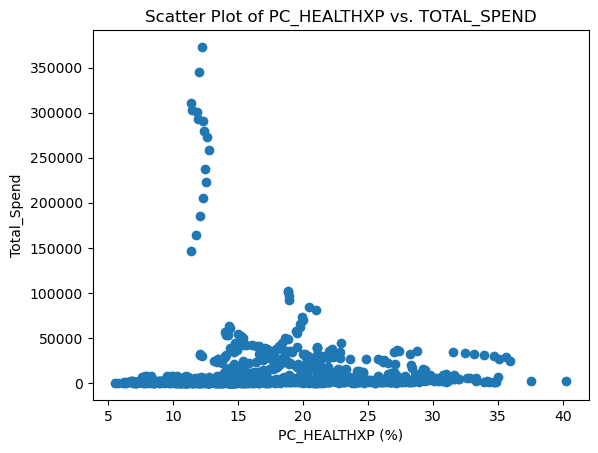

In [7]:
# Plot PC_HEALTHXP vs. TOTAL_SPEND
plt.scatter(x='PC_HEALTHXP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('PC_HEALTHXP (%)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of PC_HEALTHXP vs. TOTAL_SPEND')
plt.show()

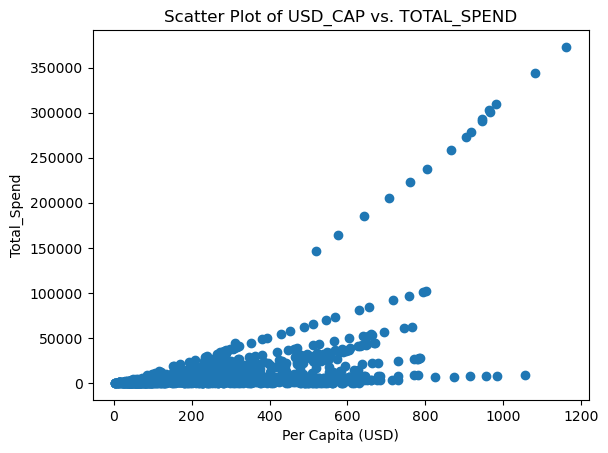

In [8]:
# Plot USD_CAP vs. TOTAL_SPEND
plt.scatter(x='USD_CAP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('Per Capita (USD)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of USD_CAP vs. TOTAL_SPEND')
plt.show()

In [16]:
df_train, df_test = train_test_split(
    df, train_size=0.75, random_state=42
)

In [17]:
df_train.shape

(777, 7)

In [18]:
df_test.shape

(259, 7)

In [21]:
import math

def rmspe(y_true, y_pred):
    """
    Calculate Root Mean Squared Prediction Error (RMSPE) # or also called RMSE: Root Mean Squared Error
    
    Parameters:
    y_true: list-like, actual values
    y_pred: list-like, predicted values
    
    Returns:
    float: RMSPE value
    """
    n = len(y_true)
    squared_errors = []

    for i in range(n):
        error = y_true[i] - y_pred[i]
        squared_errors.append(error ** 2)

    mean_squared_error = sum(squared_errors) / n

    # Calculate the square root of the mean squared error
    rmspe_value = math.sqrt(mean_squared_error)
    
    return rmspe_value

In [19]:
# Step 1: Define features and target variable
X_train = df_train[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]
y_train = df_train['TOTAL_SPEND']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [22]:
# Step 2: Initialize K-NN regressor
knn_regressor = KNeighborsRegressor()

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": range(1, 201, 3),        # But wait...? What is this?
}

# Step 4: Initialize and fit GridSearchCV
df_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

df_gridsearch.fit(X_train, y_train)

# Step 5: Retrieve and format results
results = pd.DataFrame(df_gridsearch.cv_results_)     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.
results = (
    results[[
        "param_n_neighbors",
        "mean_test_score"
    ]]
    .rename(columns={"param_n_neighbors": "n_neighbors"})
) # we specify the scoring metric as "neg_root_mean_squared_error" to evaluate the model performance based on RMSPE.

print(results)

    n_neighbors  mean_test_score
0             1    -39916.983044
1             4    -27261.717192
2             7    -28251.735969
3            10    -27114.287305
4            13    -27528.820733
..          ...              ...
62          187    -33889.835069
63          190    -33932.029749
64          193    -33982.282684
65          196    -34022.425237
66          199    -34062.588759

[67 rows x 2 columns]


In [23]:
results["mean_test_score"] = -results["mean_test_score"]
results

,n_neighbors,mean_test_score
0,1,39916.983044
1,4,27261.717192
2,7,28251.735969
3,10,27114.287305
4,13,27528.820733
...,...,...
62,187,33889.835069
63,190,33932.029749
64,193,33982.282684
65,196,34022.425237


In [24]:
results.nsmallest(1, 'mean_test_score')

,n_neighbors,mean_test_score
3,10,27114.287305


In [25]:
df_gridsearch.best_params_

{'n_neighbors': 10}

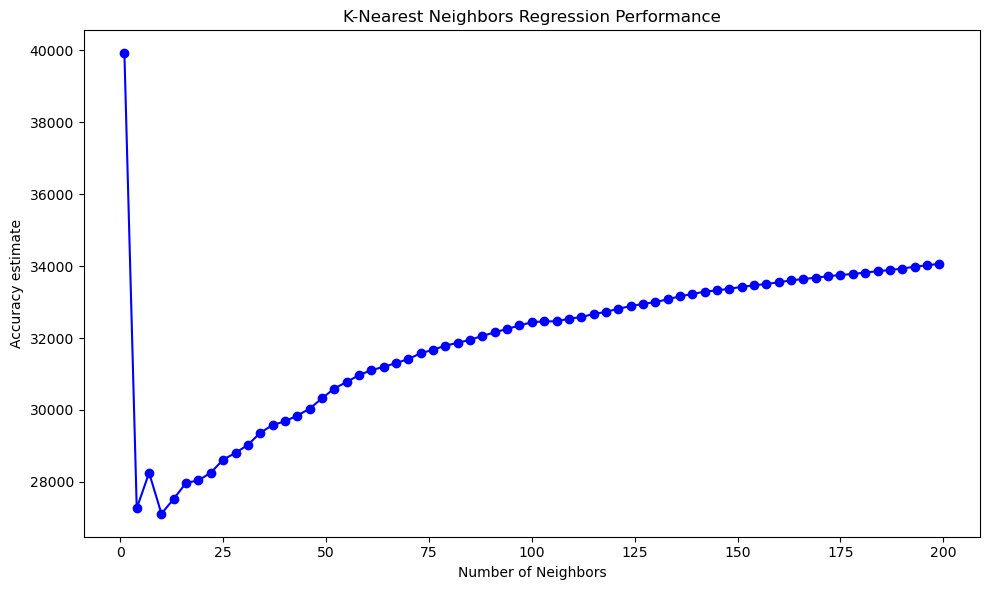

In [26]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [29]:
# Make predictions on the test set
df_test['predicted'] = df_gridsearch.predict(df_test[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']])

# Calculate RMSPE
rmspe = mean_squared_error(
    y_true=df_test["TOTAL_SPEND"],
    y_pred=df_test["predicted"]
)**0.5

rmspe

0.0

In [32]:
# Define features and target variable
X = df[['USD_CAP']]
y = df['TOTAL_SPEND']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
X_train.shape

(725, 1)

In [41]:
X_test.shape

(311, 1)

In [33]:
# Step 2: Initialize K-NN regressor
knn_regressor = KNeighborsRegressor()

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": range(1, 201, 3),        # But wait...? What is this?
}

# Step 4: Initialize and fit GridSearchCV
df_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

df_gridsearch.fit(X_train, y_train)

# Step 5: Retrieve and format results
results = pd.DataFrame(df_gridsearch.cv_results_)     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.
results = (
    results[[
        "param_n_neighbors",
        "mean_test_score"
    ]]
    .rename(columns={"param_n_neighbors": "n_neighbors"})
) # we specify the scoring metric as "neg_root_mean_squared_error" to evaluate the model performance based on RMSPE.

print(results)

    n_neighbors  mean_test_score
0             1    -39882.947706
1             4    -28013.005279
2             7    -29424.639133
3            10    -28457.741436
4            13    -28805.773188
..          ...              ...
62          187    -32836.594989
63          190    -32858.040309
64          193    -32902.963937
65          196    -32931.979574
66          199    -32958.428494

[67 rows x 2 columns]


In [34]:
results["mean_test_score"] = -results["mean_test_score"]
results

,n_neighbors,mean_test_score
0,1,39882.947706
1,4,28013.005279
2,7,29424.639133
3,10,28457.741436
4,13,28805.773188
...,...,...
62,187,32836.594989
63,190,32858.040309
64,193,32902.963937
65,196,32931.979574


In [35]:
results.nsmallest(1, 'mean_test_score')

,n_neighbors,mean_test_score
1,4,28013.005279


In [36]:
df_gridsearch.best_params_

{'n_neighbors': 4}

In [37]:
# Make predictions on the test set
df_test['predicted'] = df_gridsearch.predict(df_test[['USD_CAP']])

# Calculate RMSPE
rmspe = mean_squared_error(
    y_true=df_test["TOTAL_SPEND"],
    y_pred=df_test["predicted"]
)**0.5

rmspe

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


174420.5743900692